In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
plt.style.use("bmh")

The forward price $F_t(T)$ is the future value of the spot price $S_t$ using the interest rate differential as the adjustment yield. that is:

$$
Ft(T) = S_t e^{(r_n - r_b)\tau}
$$

In [149]:
St = 1.0586 # spot price (EURUSD)
rb = 0.02 # yield of the base currency (EUR)
rn = 0.04 # yield of the numeraire currency (USD)
T = 1 # forward maturity
t = 0 # todays data
tau = t - T # time to maturity

def forward_price(St, rn, rb, tau):
    return St * (np.e ** ((rn - rb) * tau))

Ft = forward_price(St=St, rn=rn, rb=rb, tau=tau)

Ft

1.037638315562531

Text(0.5, 1.0, 'Forward as a function of T')

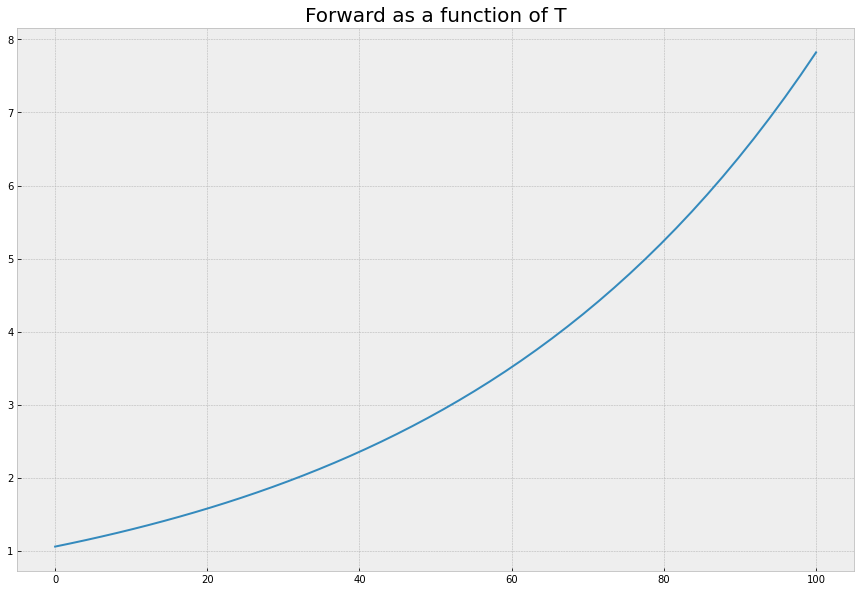

In [150]:
Ts = np.linspace(start=0, stop=100, num=50)
Sts = [St for val in Ts]
rns = [rn for val in Ts]
rbs = [rb for val in Ts]

Fts = np.array(list(map(forward_price, Sts, rns, rbs, Ts)))

plt.plot(Ts, Fts)
plt.title(label="Forward as a function of T", fontdict={"fontsize": 20})

Text(0.5, 1.0, 'Forward as a function of rn (yield on USD)')

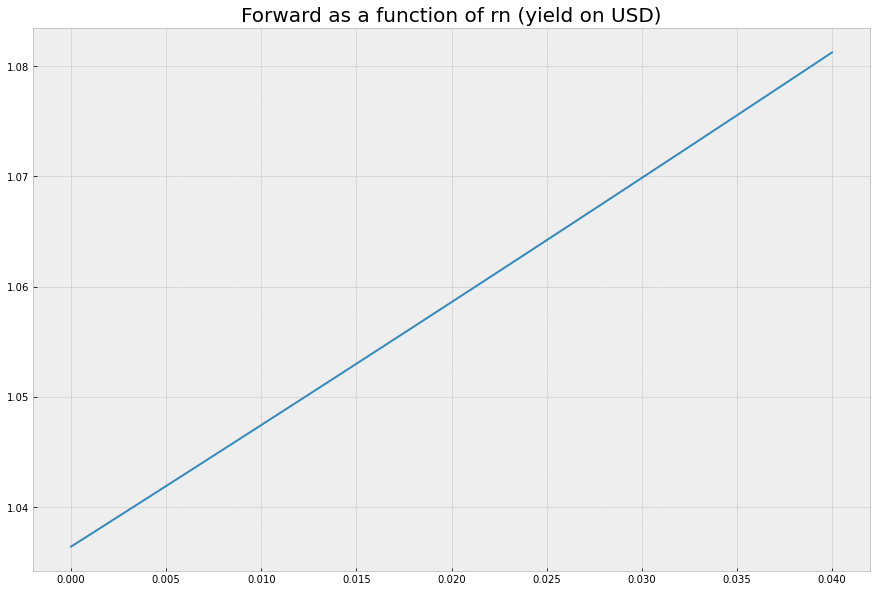

In [151]:
rns = np.linspace(start=0, stop=np.max([rb, rn]), num=50)
Ts = [St for val in rns]
Sts = [St for val in rns]
rbs = [rb for val in rns]

Fts = np.array(list(map(forward_price, Sts, rns, rbs, Ts)))

plt.plot(rns, Fts)
plt.title(label="Forward as a function of rn (yield on USD)", fontdict={"fontsize": 20})

Text(0.5, 1.0, 'Forward as a function of rb (yield on EUR)')

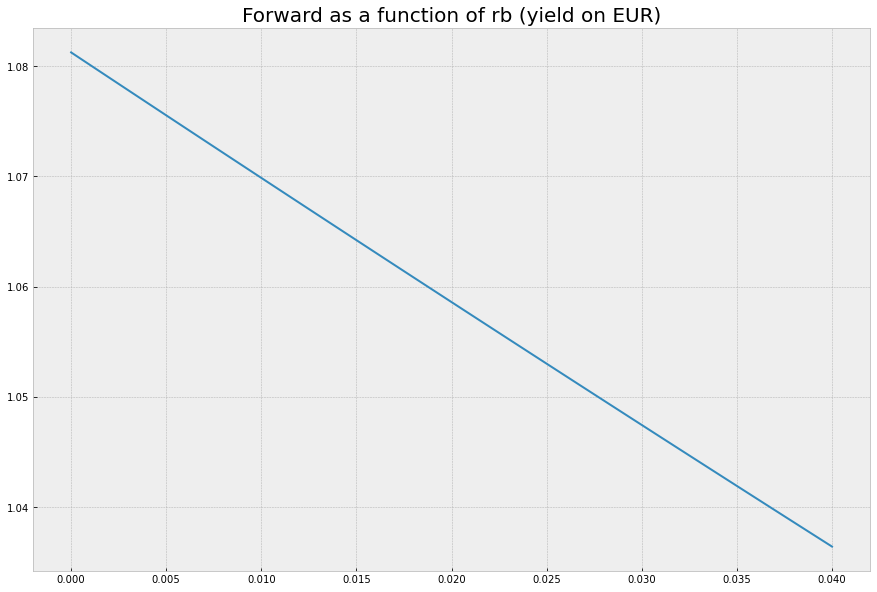

In [152]:
rbs = np.linspace(start=0, stop=np.max([rb, rn]), num=50)
Ts = [St for val in rbs]
Sts = [St for val in rbs]
rns = [rb for val in rbs]

Fts = np.array(list(map(forward_price, Sts, rns, rbs, Ts)))

plt.plot(rbs, Fts)
plt.title(label="Forward as a function of rb (yield on EUR)", fontdict={"fontsize": 20})

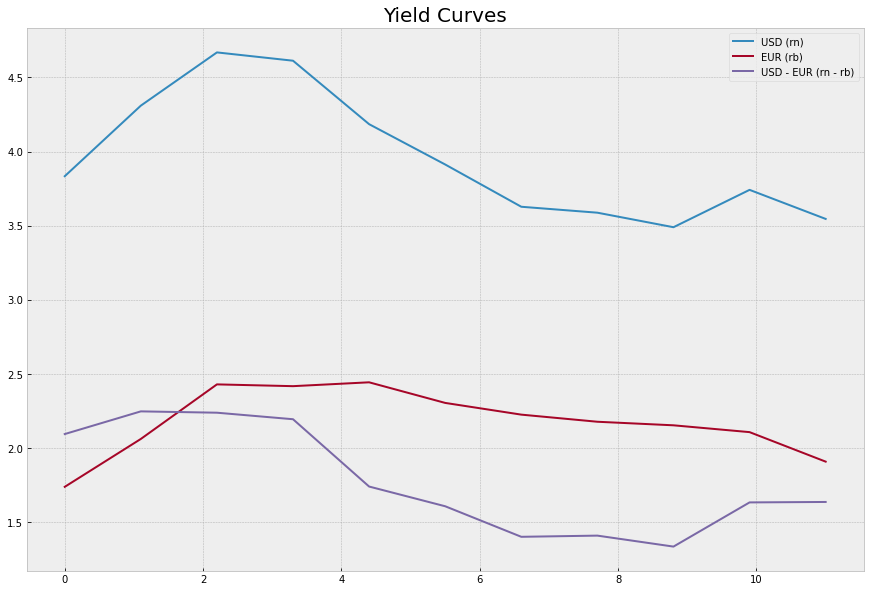

In [166]:
rns = np.array([0.03834,0.0431,0.04669,0.04613,0.04185,0.03913,0.03628,0.03588,0.0349,0.03742,0.03546])
rbs = np.array([0.01739,0.02062,0.0243,0.02418,0.02444,0.02305,0.02226,0.02178,0.02154,0.02108,0.01909])
Ts = [1/12 * 3, 1/12 * 6, 1/12 * 9, 1, 2, 3, 5, 7, 10, 20, 30]
Sts = [St for val in rbs]

xs = np.linspace(start=0, stop=rns.shape[0], num=rns.shape[0])

plt.plot(xs, rns * 100, label="USD (rn)")
plt.plot(xs, rbs * 100, label="EUR (rb)")
plt.plot(xs, (rns - rbs) * 100, label="USD - EUR (rn - rb)")
plt.title(label="Yield Curves", fontdict={"fontsize": 20})
plt.legend()

Text(0.5, 1.0, 'Forward Curve EURUSD')

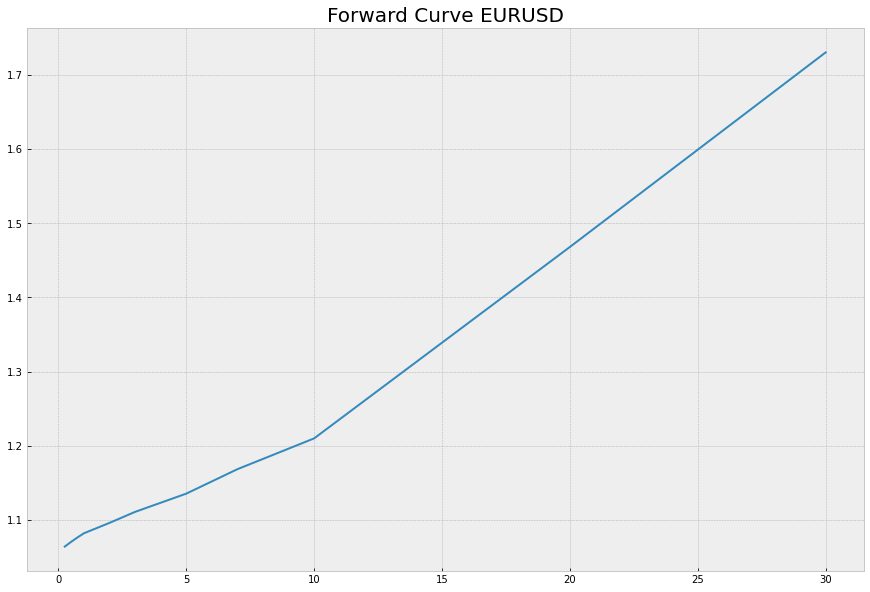

In [169]:
Fts = np.array(list(map(forward_price, Sts, rns, rbs, Ts)))

plt.plot(Ts, Fts)
plt.title(label="Forward Curve EURUSD", fontdict={"fontsize": 20})

In [172]:
print("EURUSD spot: " + str(St))

EURUSD spot: 1.0586


In [176]:
rf = rbs[3]
print("EUR 1y interest rate: " + str(rf * 100))

EUR 1y interest rate: 2.418


In [178]:
rd = rns[3]
print("USD 1y interest rate: " + str(rd * 100))

USD 1y interest rate: 4.6129999999999995


In [170]:
St
np.e ** (0.02 * 1)

1.0202013400267558

1. Borrow $S_t$ USDs to purchase 1 EUR
2. Sell $e^{r_f\tau}$ EUR notional at strike $F_t(T)$
3. 1 EUR grows to $e^{r_f\tau}$ in EUR value at time $T$
4. The forward contract settles and you sell $e^{r_f\tau}$ EUR in exchange of $e^{r_f\tau} \times F_t(T)$ USD
5. Repay  $S_t \times e^{r_d\tau}$

Thus, the investors payoff is:

$$
e^{r_f\tau} \times F_t(T) - S_t \times e^{r_d\tau} = 0
$$

which under no-arbitrage conditions must be equal to zero.

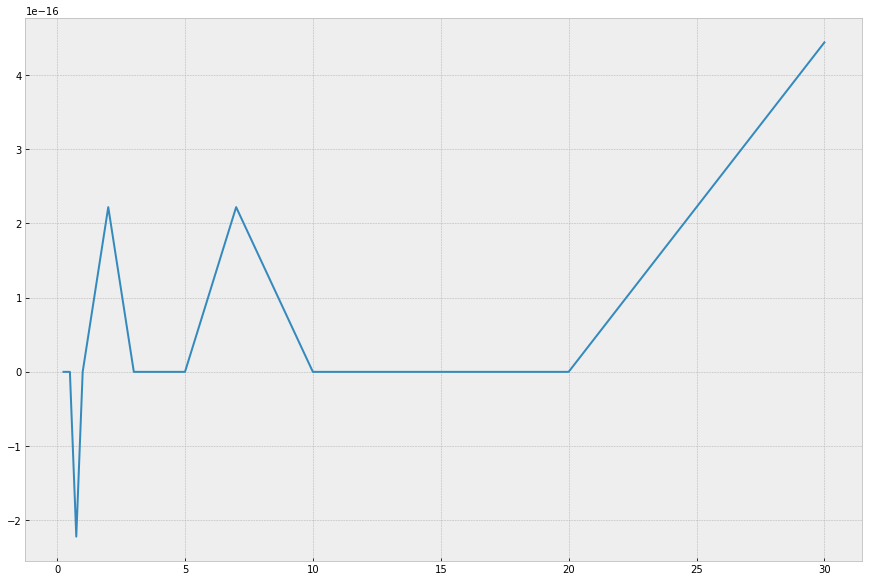

In [185]:
plt.plot(Ts, ((np.e ** (rbs * Ts)) * Fts) - (St * (np.e ** (rns * Ts))))

If $ e^{r_f\tau} \times F_t(T) > S_t \times e^{r_d\tau} $, then we can:

1. Borrow $S_t$ at USD to buy 1 EUR
2. Sell $e^{r_f\tau}$ EUR notional of the EURUSD forward contract at $F_t(T)$
3. At time $T$, the 1 EUR notional grows to $e^{r_f\tau}$ which we exchange for $e^{r_f\tau} \times F_t(T)$ USDs
4. At time $T$, the lending in USDs grows to $S_t \times e^{r_d\tau}$ which is less than $e^{r_f\tau} \times F_t(T)$